# Project: Feature Engineering - Concrete Strength Prediction

The objective of this project is to predict the concrete strength using the data available in file "concrete.csv". The feature engineering and model tuning techniques will be used to improve the prediction score.

#### Import the necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#### Read the dataset into dataframe

In [2]:
df = pd.read_csv('concrete.csv')
df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


## Univariate analysis

#### Check data type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
print(df.shape)

(1030, 9)


In [5]:
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

#### statistical summary

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## Conclusions from Initial Data Analysis
-	There are no categorical columns in the data set. All the columns are numerical
-	There are no cells with missing data
-	slag, ash and superplastic has many rows with 0 das cell data. Ash has more than 50% of the rows with 0 as value. Slag and superplastic has more than 25% of the rows with 0 as cell value. 
-	We can assume that 0 values are acceptable since we are studying the concrete mixture. Those data sets might not have ash, slag or superplastic as part of the mixture.
- Columns strength, age, superplastic and slag has some outliers on the higher end.

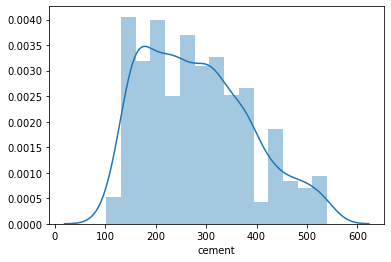

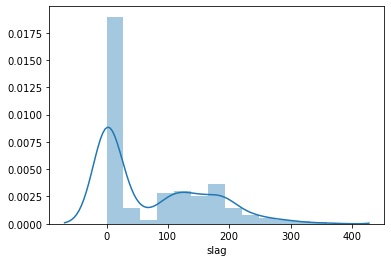

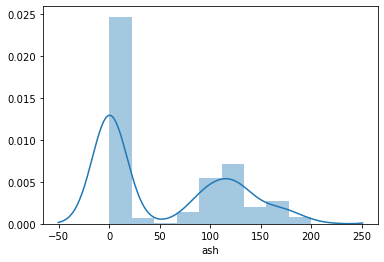

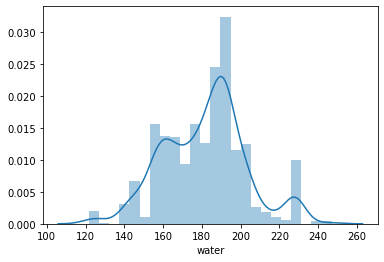

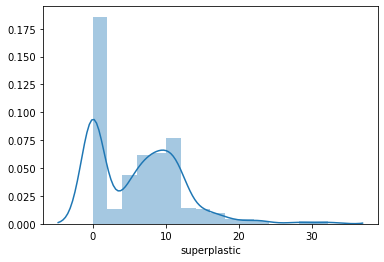

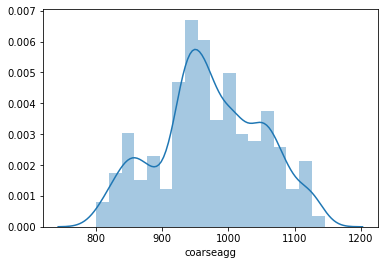

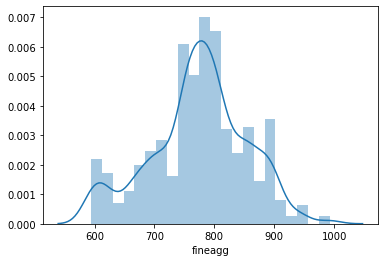

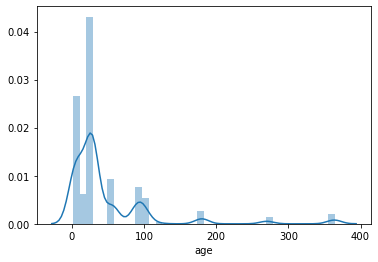

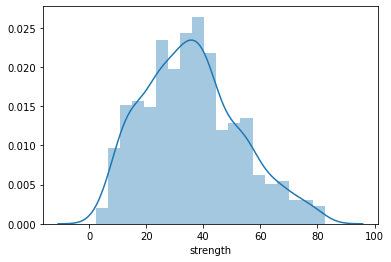

In [7]:
for column in df.columns: 
    if df[column].dtype.name != 'category': 
        sns.distplot(df[column])
        plt.show()

-  Columns cement and strength follow a near normal distribution
-  Other columns does not fall into a near normal distribution and the data is skewed with multiple peaks. 
-  We have only 1030 data set and most of the columns has skewed and continuous data. For the algorithms to learn better, we need to put these data points into bins

In [8]:
for column in df.columns: 
    df[column] = pd.cut(df[column],bins=4,labels=[1,2,3,4])

In [9]:
df.head(20)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,1,3,1,3,1,2,2,1,2
1,1,1,3,2,2,4,3,1,2
2,2,1,2,3,1,2,3,1,2
3,2,2,1,4,1,2,1,1,3
4,1,3,1,3,2,3,2,1,1
5,2,1,1,3,1,2,4,1,1
6,1,3,1,3,1,3,1,1,1
7,2,1,3,3,1,3,2,1,2
8,2,1,1,3,1,4,2,1,1
9,1,3,3,3,2,1,2,1,2


-  All the columns are put into 4 numerical bins

In [10]:
df.describe().transpose()

,count,unique,top,freq
cement,1030,4,2,391
slag,1030,4,1,592
ash,1030,4,1,581
water,1030,4,3,458
superplastic,1030,4,1,630
coarseagg,1030,4,2,383
fineagg,1030,4,2,449
age,1030,4,1,916
strength,1030,4,2,479


In [11]:
for column in df.columns: 
    print(pd.crosstab(df[column],df['strength']))
    print()

strength    1    2   3   4
cement                    
1         114  148  33   0
2          91  187  98  15
3          26  113  70  39
4           1   31  43  21

strength    1    2    3   4
slag                       
1         155  280  137  20
2          47  117   81  24
3          22   73   23  29
4           8    9    3   2

strength    1    2    3   4
ash                        
1         141  245  131  64
2          11   66   41   2
3          49  134   54   9
4          31   34   18   0

strength    1    2    3   4
water                      
1           4   18   28  21
2          71  181  135  47
3         153  242   56   7
4           4   38   25   0

strength        1    2    3   4
superplastic                   
1             183  320  114  13
2              47  145  109  48
3               2   12   16  11
4               0    2    5   3

strength    1    2   3   4
coarseagg                 
1          15   81  49  24
2          74  186  93  30
3          92  162  67   9
4 

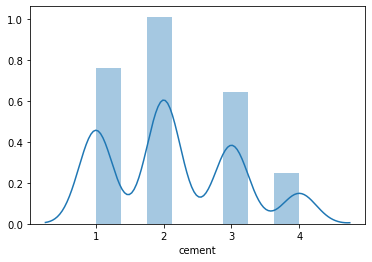

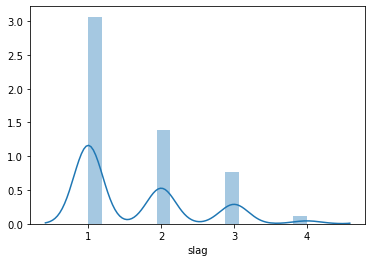

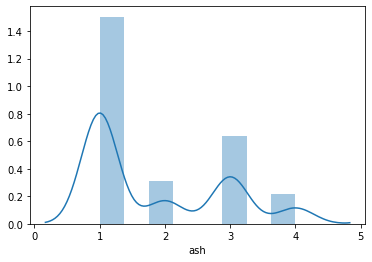

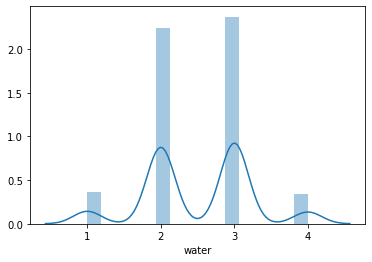

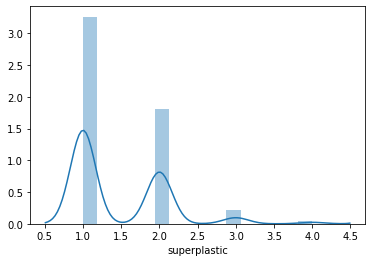

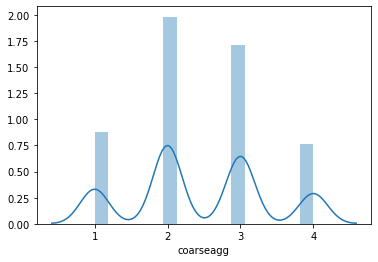

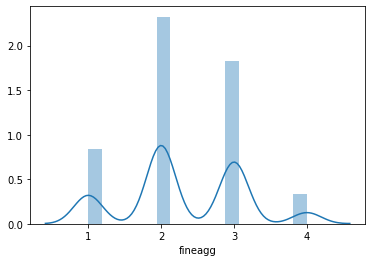

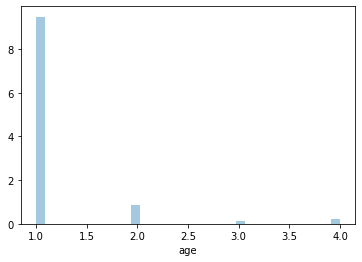

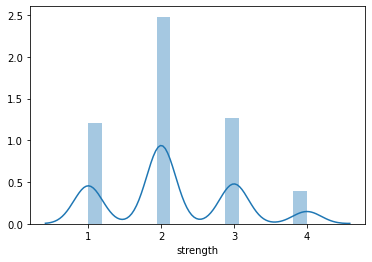

In [12]:
for column in df.columns: 
        sns.distplot(df[column])
        plt.show()

In [13]:
for column in df.columns: 
    if df[column].dtype.name == 'category': 
        print(df[column].value_counts(normalize=False))
        print()

2    391
1    295
3    248
4     96
Name: cement, dtype: int64

1    592
2    269
3    147
4     22
Name: slag, dtype: int64

1    581
3    246
2    120
4     83
Name: ash, dtype: int64

3    458
2    434
1     71
4     67
Name: water, dtype: int64

1    630
2    349
3     41
4     10
Name: superplastic, dtype: int64

2    383
3    330
1    169
4    148
Name: coarseagg, dtype: int64

2    449
3    354
1    163
4     64
Name: fineagg, dtype: int64

1    916
2     81
4     20
3     13
Name: age, dtype: int64

2    479
3    244
1    232
4     75
Name: strength, dtype: int64



## Multivariate analysis

In [14]:
for column in df.columns: 
    if df[column].dtype.name == 'category': 
        print(pd.crosstab(df[column],df['strength'],normalize='index'))
        print()

strength         1         2         3         4
cement                                          
1         0.386441  0.501695  0.111864  0.000000
2         0.232737  0.478261  0.250639  0.038363
3         0.104839  0.455645  0.282258  0.157258
4         0.010417  0.322917  0.447917  0.218750

strength         1         2         3         4
slag                                            
1         0.261824  0.472973  0.231419  0.033784
2         0.174721  0.434944  0.301115  0.089219
3         0.149660  0.496599  0.156463  0.197279
4         0.363636  0.409091  0.136364  0.090909

strength         1         2         3         4
ash                                             
1         0.242685  0.421687  0.225473  0.110155
2         0.091667  0.550000  0.341667  0.016667
3         0.199187  0.544715  0.219512  0.036585
4         0.373494  0.409639  0.216867  0.000000

strength         1         2         3         4
water                                           
1         0.05633

In [15]:
#for column in df.columns: 
    #print(df[column].dtype.name == 'category')
    #df[column] = pd.to_numeric(df[column])    

In [16]:
cor = df.corr() 
cor

""


## Feature Engineering

In [17]:
# splitting data into training and test set for independent attributes
X_train, X_test, y_train, y_test =train_test_split(df.drop('strength',axis=1), df['strength'], test_size=.25, random_state=12)
X_train.shape,X_test.shape
X = df.drop('strength',axis=1)
y = df['strength']

In [18]:
y_train.shape,y_test.shape

((772,), (258,))

In [19]:
y_train

334     2
22      1
791     2
397     2
1018    1
       ..
418     3
473     4
49      2
278     2
432     2
Name: strength, Length: 772, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

## DecisionTreeClassifier

In [20]:
# print confusion matrix in graphic formatcm = confusion_matrix(y_test, y_pred)
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [1,2,3,4] , yticklabels = [1,2,3,4] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [21]:
model_entropy=DecisionTreeClassifier(criterion='entropy', random_state = 12)
model_entropy.fit(X_train, y_train)
training_acc_DT = model_entropy.score(X_train, y_train)
training_acc_DT

0.7305699481865285

In [22]:
test_acc_DT= model_entropy.score(X_test, y_test) 
y_pred = model_entropy.predict(X_test) 
test_acc_DT

0.5232558139534884

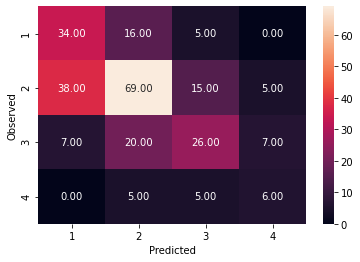

None


In [23]:
print(draw_cm(y_test,y_pred))

In [24]:
training_accuracy =  model_entropy.score(X_train,y_train)
test_accuracy = model_entropy.score(X_test, y_test)
print("Trainig accuracy",training_accuracy)  
print()
print("Testing accuracy",test_accuracy)
print()
print("Recall:",recall_score(y_test,y_pred,average='micro'))
print()
print("Precision:",precision_score(y_test,y_pred,average='micro'))

Trainig accuracy 0.7305699481865285

Testing accuracy 0.5232558139534884

Recall: 0.5232558139534884

Precision: 0.5232558139534884


In [25]:
result_df = pd.DataFrame(columns=['Method', 'Training Accuracy', 'Test Accuracy'])
result_df = result_df.append({'Method':'Decision Tree', 'Training Accuracy': training_accuracy, 'Test Accuracy': test_accuracy}, ignore_index=True)
result_df

,Method,Training Accuracy,Test Accuracy
0,Decision Tree,0.73057,0.523256


### The model is overfirtiing with 73% training accuracy and only 52% test accuracy
- We need to prune the classifier . Let us try with a depth of 3 and min_samples_leaf=5

In [26]:
model_pruned = DecisionTreeClassifier(criterion='entropy', random_state = 12, max_depth=10, min_samples_leaf=5)
model_pruned.fit(X_train, y_train)
training_acc_DT_prune = model_pruned.score(X_train, y_train)
y_pred = model_pruned.predict(X_test)

In [27]:
test_acc_DT_prune = model_pruned.score(X_test, y_test) 

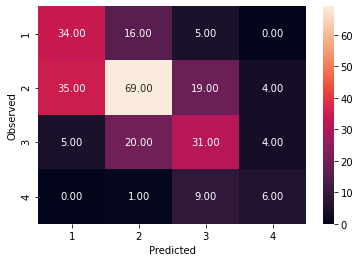

None


In [28]:
print(draw_cm(y_test,y_pred))

In [29]:
training_accuracy =  model_pruned.score(X_train,y_train)
test_accuracy = model_pruned.score(X_test, y_test)
print("Trainig accuracy",training_accuracy)  
print()
print("Testing accuracy",test_accuracy)
print()
print("Recall:",recall_score(y_test,y_pred,average='micro'))
print()
print("Precision:",precision_score(y_test,y_pred,average='micro'))
result_df = result_df.append({'Method':'Decision Tree Pruned', 'Training Accuracy': training_accuracy, 'Test Accuracy': test_accuracy}, ignore_index=True)
result_df

Trainig accuracy 0.6722797927461139

Testing accuracy 0.5426356589147286

Recall: 0.5426356589147286

Precision: 0.5426356589147286


,Method,Training Accuracy,Test Accuracy
0,Decision Tree,0.73057,0.523256
1,Decision Tree Pruned,0.67228,0.542636


### The DecisionTreeClassifier with pruning is not giving good results

## AdaBoostClassifier

In [30]:
abcl = AdaBoostClassifier(n_estimators = 10000, learning_rate=0.1, random_state=12)
abcl = abcl.fit(X_train, y_train)

In [31]:
y_pred =abcl.predict(X_test)

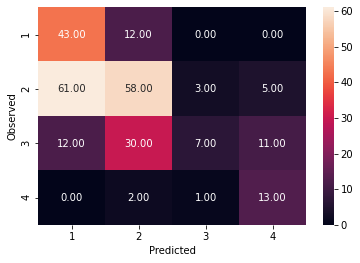

None


In [32]:
print(draw_cm(y_test,y_pred))

In [33]:
training_accuracy =  abcl.score(X_train,y_train)
test_accuracy = abcl.score(X_test, y_test)
print("Trainig accuracy",training_accuracy)  
print()
print("Testing accuracy",test_accuracy)
print()
print("Recall:",recall_score(y_test,y_pred,average='micro'))
print()
print("Precision:",precision_score(y_test,y_pred,average='micro'))
result_df = result_df.append({'Method':'AdaBoostClassifier', 'Training Accuracy': training_accuracy, 'Test Accuracy': test_accuracy}, ignore_index=True)
result_df

Trainig accuracy 0.47538860103626945

Testing accuracy 0.4689922480620155

Recall: 0.4689922480620155

Precision: 0.4689922480620155


,Method,Training Accuracy,Test Accuracy
0,Decision Tree,0.730570,0.523256
1,Decision Tree Pruned,0.672280,0.542636
2,AdaBoostClassifier,0.475389,0.468992


### The AdaBoostClassifier is not giving better result

## BaggingClassifier

In [34]:
bgcl = BaggingClassifier(n_estimators=1000, max_samples= .7, bootstrap=True, oob_score=True, random_state=12)
bgcl = bgcl.fit(X_train, y_train)

In [35]:
y_pred = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, y_pred)

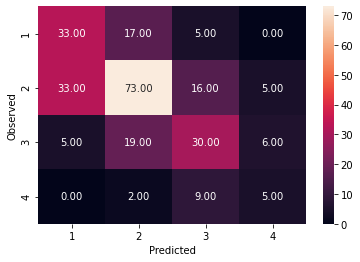

None


In [36]:
print(draw_cm(y_test,y_pred))

In [37]:
training_accuracy =  bgcl.score(X_train,y_train)
test_accuracy = bgcl.score(X_test, y_test)
print("Trainig accuracy",training_accuracy)  
print()
print("Testing accuracy",test_accuracy)
print()
print("Recall:",recall_score(y_test,y_pred,average='micro'))
print()
print("Precision:",precision_score(y_test,y_pred,average='micro'))
result_df = result_df.append({'Method':'BaggingClassifier', 'Training Accuracy': training_accuracy, 'Test Accuracy': test_accuracy}, ignore_index=True)
result_df

Trainig accuracy 0.7305699481865285

Testing accuracy 0.5465116279069767

Recall: 0.5465116279069767

Precision: 0.5465116279069767


,Method,Training Accuracy,Test Accuracy
0,Decision Tree,0.730570,0.523256
1,Decision Tree Pruned,0.672280,0.542636
2,AdaBoostClassifier,0.475389,0.468992
3,BaggingClassifier,0.730570,0.546512


- BaggingClassifier gives reasonable results

##  RandomForestClassifier

In [38]:
rf = RandomForestClassifier(random_state=12)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
acc_RF = accuracy_score(y_test, y_pred)

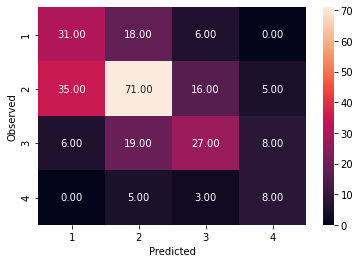

None


In [39]:
print(draw_cm(y_test,y_pred))

In [40]:
training_accuracy =  rf.score(X_train,y_train)
test_accuracy = rf.score(X_test, y_test)
print("Trainig accuracy",training_accuracy)  
print()
print("Testing accuracy",test_accuracy)
print()
print("Recall:",recall_score(y_test,y_pred,average='micro'))
print()
print("Precision:",precision_score(y_test,y_pred,average='micro'))
result_df = result_df.append({'Method':'RandomForestClassifier', 'Training Accuracy': training_accuracy, 'Test Accuracy': test_accuracy}, ignore_index=True)
result_df

Trainig accuracy 0.7305699481865285

Testing accuracy 0.5310077519379846

Recall: 0.5310077519379846

Precision: 0.5310077519379846


,Method,Training Accuracy,Test Accuracy
0,Decision Tree,0.730570,0.523256
1,Decision Tree Pruned,0.672280,0.542636
2,AdaBoostClassifier,0.475389,0.468992
3,BaggingClassifier,0.730570,0.546512
4,RandomForestClassifier,0.730570,0.531008


##  Cross Validation Score

In [41]:
#For Decision Tree dt
score_dtcv = cross_val_score(model_entropy, X, y, cv = 10).mean()
print(f'Cross validation score of Decision tree = {score_dtcv}')

Cross validation score of Decision tree = 0.554368932038835


In [42]:
#Random Forest rf
score_rfcv = cross_val_score(rf, X, y, cv = 10).mean()
print(f'Cross validation score of Random forest = {score_rfcv}')

Cross validation score of Random forest = 0.5601941747572815


In [43]:
result_df = result_df.append({'Method':'Decision Tree Cross Validation', 'Training Accuracy': score_dtcv, 'Test Accuracy':'' }, ignore_index=True)
result_df = result_df.append({'Method':'Random Forest Cross Validation', 'Training Accuracy': score_rfcv, 'Test Accuracy': ''}, ignore_index=True)
result_df

,Method,Training Accuracy,Test Accuracy
0,Decision Tree,0.730570,0.523256
1,Decision Tree Pruned,0.672280,0.542636
2,AdaBoostClassifier,0.475389,0.468992
3,BaggingClassifier,0.730570,0.546512
4,RandomForestClassifier,0.730570,0.531008
5,Decision Tree Cross Validation,0.554369,
6,Random Forest Cross Validation,0.560194,


- Cross validation doesn't provide good results

#  Model Tuning using  Grid Search or Random Search

In [44]:
parameters = {'bootstrap': [True],
 'max_depth': [5, 10, 20, 30, 40, 50, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [100]}


grid_rf = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, verbose = 2, n_jobs= 4)
grid_rf.fit(X, y)

grid_rf.best_params_


Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   10.5s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   18.2s finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [45]:

rf_new = RandomForestClassifier(bootstrap= True,
 max_depth= 10,
 max_features= 'auto',
 min_samples_leaf= 1,
 n_estimators= 100)

In [46]:
rf_new.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc_RF = accuracy_score(y_test, y_pred)

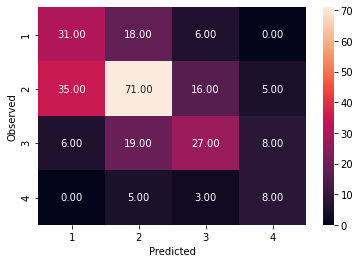

None


In [47]:
print(draw_cm(y_test,y_pred))

In [48]:
training_accuracy =  rf_new.score(X_train,y_train)
test_accuracy = rf_new.score(X_test, y_test)
print("Trainig accuracy",training_accuracy)  
print()
print("Testing accuracy",test_accuracy)
print()
print("Recall:",recall_score(y_test,y_pred,average='micro'))
print()
print("Precision:",precision_score(y_test,y_pred,average='micro'))
result_df = result_df.append({'Method':'RandomForestClassifier- with Grid Search', 'Training Accuracy': training_accuracy, 'Test Accuracy': test_accuracy}, ignore_index=True)
result_df

Trainig accuracy 0.7292746113989638

Testing accuracy 0.5581395348837209

Recall: 0.5310077519379846

Precision: 0.5310077519379846


,Method,Training Accuracy,Test Accuracy
0,Decision Tree,0.730570,0.523256
1,Decision Tree Pruned,0.672280,0.542636
2,AdaBoostClassifier,0.475389,0.468992
3,BaggingClassifier,0.730570,0.546512
4,RandomForestClassifier,0.730570,0.531008
5,Decision Tree Cross Validation,0.554369,
6,Random Forest Cross Validation,0.560194,
7,RandomForestClassifier- with Grid Search,0.729275,0.55814


### RandomSearch

In [49]:
samples = 1000
rf_new2 = RandomForestClassifier(n_estimators=1000)
random_search = RandomizedSearchCV(rf_new2, param_distributions=parameters, n_iter=samples)

In [50]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc_RF = accuracy_score(y_test, y_pred)

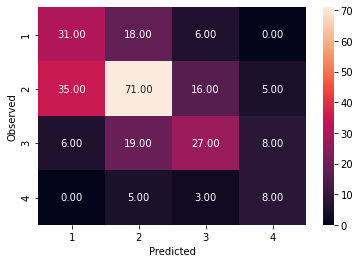

None


In [51]:
print(draw_cm(y_test,y_pred))

In [52]:
training_accuracy =  rf.score(X_train,y_train)
test_accuracy = rf.score(X_test, y_test)
print("Trainig accuracy",training_accuracy)  
print()
print("Testing accuracy",test_accuracy)
print()
print("Recall:",recall_score(y_test,y_pred,average='micro'))
print()
print("Precision:",precision_score(y_test,y_pred,average='micro'))
result_df = result_df.append({'Method':'RandomForestClassifier- with random search', 'Training Accuracy': training_accuracy, 'Test Accuracy': test_accuracy}, ignore_index=True)
result_df

Trainig accuracy 0.7305699481865285

Testing accuracy 0.5310077519379846

Recall: 0.5310077519379846

Precision: 0.5310077519379846


,Method,Training Accuracy,Test Accuracy
0,Decision Tree,0.730570,0.523256
1,Decision Tree Pruned,0.672280,0.542636
2,AdaBoostClassifier,0.475389,0.468992
3,BaggingClassifier,0.730570,0.546512
4,RandomForestClassifier,0.730570,0.531008
5,Decision Tree Cross Validation,0.554369,
6,Random Forest Cross Validation,0.560194,
7,RandomForestClassifier- with Grid Search,0.729275,0.55814
8,RandomForestClassifier- with random search,0.730570,0.531008


#  Comarison of results and conclusion

In [53]:
result_df

,Method,Training Accuracy,Test Accuracy
0,Decision Tree,0.730570,0.523256
1,Decision Tree Pruned,0.672280,0.542636
2,AdaBoostClassifier,0.475389,0.468992
3,BaggingClassifier,0.730570,0.546512
4,RandomForestClassifier,0.730570,0.531008
5,Decision Tree Cross Validation,0.554369,
6,Random Forest Cross Validation,0.560194,
7,RandomForestClassifier- with Grid Search,0.729275,0.55814
8,RandomForestClassifier- with random search,0.730570,0.531008


- RandomForestClassifier- with Grid Search gives the best result
- Since we have only 1030 rows of data, the model seems to be struggling to make accurate predictions
- I started putting the data into 10 bins for each column, but it provides very ppor results
- If we reduce the number of bins to 3 or 2, we could get better results. 

